## Automation Tool for matching terms in local XML files 
(version 03/10/2023)

### Import packages and settings

* pandas: a library for data manipulation and analysis.
* numpy: a library for scientific computing with Python.
* lxml: a library for processing XML and HTML documents.
* os: a library for operating system-related functions.
* re: a library for regular expressions, used for pattern matching.
* warnings: a library for issuing warnings to the user.
* plotly.express: a library for creating interactive plots and charts.

In [1]:
import pandas as pd 
import numpy as np
from lxml import etree
import os
import re
import warnings
import plotly.express as px
import plotly.io as pio

* sets a filter for warnings if needed:

In [2]:
# warnings.filterwarnings("ignore", category=UserWarning)

* controls the maximum width of each column in a pandas dataframe. By setting it to -1, pandas will display the full contents of each column, without any truncation:

In [3]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_175588\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


* controls the maximum number of rows that pandas will display in the console output. By setting it to None, pandas will display all rows of a dataframe or series, regardless of how many there are:

In [4]:
# pd.set_option('display.max_rows', None)

### Define functions to extract content from xml files
#### 1. xml files without namespaces
#### 2. xml files with namespaces

In [5]:
# function 1 - parse the xml file without namespaces

def parse_xml_to_df(xml_file):
    
    try:
        # Parse the XML file
        tree = etree.parse(xml_file)
        root = tree.getroot()

        # Create a list to store the data
        data = []

        # Iterate over all elements in the XML file
        for element in root:
            # Create a dictionary to store the data for each element
            element_data = {}
            
            ## extract id
            eadid = root.find('.//eadid')
            if eadid is not None:
                element_data['ead_id'] = eadid.text
            
            publicid = eadid.get('publicid')
            if publicid is not None:
                result = re.search(r'::(.*)\.xml', publicid)
                if result:
                    public_id = result.group(1).split('::')[-1]
                    element_data['public_id'] = public_id    
            
            ## EXtract abstract
            abstract = element.find('.//abstract')
            if abstract is not None:
                element_data['abstract'] = abstract.text

            ## Extract language
            language = element.find('.//langmaterial')
            if language is not None:
                element_data['language'] = ''.join(language.itertext())

            ## Extract scopecontent
            scopecontent = element.findall('./scopecontent')
            if scopecontent:
                scopecontent_texts = []
                for sc in scopecontent:
                    paragraphs = sc.findall('./p')
                    if paragraphs:
                        for p in paragraphs:
                            p_text = ""
                            for child in p.itertext():
                                p_text += child
                            scopecontent_texts.append(p_text)
                element_data['scopecontent'] = ', '.join(scopecontent_texts)

            ## Extract controlaccess - e.g., <subject>, <genreform>, <geogname>, <persname>, <corpname>, <famname> etc.
            controlaccess = element.find('.//controlaccess')
            if controlaccess is not None:
                subjects = controlaccess.findall('.//subject')
                if subjects:
                    element_data['subjects'] = ', '.join([subject.text for subject in subjects])
                genreforms = controlaccess.findall('.//genreform')
                if genreforms:
                    element_data['genreforms'] = ', '.join([genreform.text for genreform in genreforms])
                geognames = controlaccess.findall('.//geogname')
                if geognames:
                    element_data['geognames'] = ', '.join([geogname.text for geogname in geognames])
                persnames = controlaccess.findall('.//persname')
                if persnames:
                    element_data['persnames'] = ', '.join([persname.text for persname in persnames])
                corpnames = controlaccess.findall('.//corpname')
                if corpnames:
                    element_data['corpnames'] = ', '.join([corpname.text for corpname in corpnames])
                famnames = controlaccess.findall('.//famname')
                if famnames:
                    element_data['famnames'] = ', '.join([famname.text for famname in famnames])

            ## Extract bioghist    
            bioghist = element.findall('./bioghist')
            if bioghist:
                bioghist_texts = []
                for bio in bioghist:
                    paragraphs = bio.findall('./p')
                    if paragraphs:
                        for p in paragraphs:
                            p_text = ""
                            for child in p.itertext():
                                p_text += child
                            bioghist_texts.append(p_text)
                element_data['bioghist'] = ', '.join(bioghist_texts)

            ## Extract custodhist
            custodhist = element.findall('./custodhist')
            if custodhist:
                custodhist_texts = []
                for cus in custodhist:
                    paragraphs = cus.findall('./p')
                    if paragraphs:
                        for p in paragraphs:
                            p_text = ""
                            for child in p.itertext():
                                p_text += child
                            custodhist_texts.append(p_text)
                element_data['custodhist'] = ', '.join(custodhist_texts)



            # Add the element data to the list of data
            data.append(element_data)

        # print(data)
        
        df = pd.DataFrame([d for d in data if len(d)>2])

    except:
        # If error, print the error message and skip the file
        print("Error parsing file:", xml_file)
        df = None
    
    return df

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: If the xml files contain namespaces, you need to define the namespace prefix and URI:</span>


In [6]:
# TODO: Define the namespace prefix and URI

# e.g., for SCRC:
namespaces = {
    "ead": "urn:isbn:1-931666-22-9",
    "xlink": "http://www.w3.org/1999/xlink",
    "xsi": "http://www.w3.org/2001/XMLSchema-instance"
}

In [7]:
# Function 2 - parse xml file with namespaces - (FOR SCRC files)

def parse_xml_to_df_ns(xml_file):
    try:
        
        # Parse the XML file
        tree = etree.parse(xml_file)
        root = tree.getroot()

        # Create a list to store the data
        data = []

        # Iterate over all elements in the XML file
        for element in root:
            # Create a dictionary to store the data for each element
            element_data = {}

            ## extract id
            eadid = root.find('.//ead:eadid', namespaces)
            if eadid is not None:
                element_data['ead_id'] = eadid.text

            publicid = eadid.get('publicid')
            if publicid is not None:
                result = re.search(r'::(.*)\.xml', publicid)
                if result:
                    public_id = result.group(1).split('::')[-1]
                    element_data['public_id'] = public_id

            ## extract abstract
            abstract = element.find('.//ead:abstract', namespaces)
            if abstract is not None:
                element_data['abstract'] = abstract.text
             
            ## Extract language
            language = root.findall('.//ead:langmaterial', namespaces)[-1]
            if language is not None:
                element_data['language'] = ''.join(language.itertext())
                
            ## Extract scopecontent
            scopecontent = element.find('.//ead:scopecontent', namespaces)
            if scopecontent is not None:
                scopecontent_texts = []
                p_elements = scopecontent.findall('.//ead:p', namespaces)
                for p in p_elements:
                    p_text = ""
                    for child in p.itertext():
                        p_text += child
                    scopecontent_texts.append(p_text)
                element_data['scopecontent'] = ', '.join(scopecontent_texts)    

            
            ## Extract bioghist    
            bioghist = element.find('.//ead:bioghist', namespaces)
            if bioghist is not None:
                bioghist_texts = []
                p_elements = bioghist.findall('.//ead:p', namespaces)
                
                for p in p_elements:
                    p_text = ""
                    for child in p.itertext():
                        p_text += child
                    bioghist_texts.append(p_text)
                element_data['bioghist'] = ', '.join(bioghist_texts) 
           
            
            ## Extract custodhist    
            custodhist = element.find('.//ead:custodhist', namespaces)
            if custodhist is not None:
                custodhist_texts = []
                p_elements = custodhist.findall('.//ead:p', namespaces)
                
                for p in p_elements:
                    p_text = ""
                    for child in p.itertext():
                        p_text += child
                    custodhist_texts.append(p_text)
                element_data['custodhist'] = ', '.join(custodhist_texts)
            
            
            ## Extract controlaccess - e.g., <subject>, <genreform>, <geogname>, <persname>, <corpname>, <famname> etc.
            controlaccess = element.find('.//ead:controlaccess', namespaces)
            if controlaccess is not None:
                subjects = controlaccess.findall('.//ead:subject', namespaces)
                if subjects:
                    element_data['subjects'] = ', '.join([subject.text for subject in subjects])
                genreforms = controlaccess.findall('.//ead:genreform', namespaces)
                if genreforms:
                    element_data['genreforms'] = ', '.join([genreform.text for genreform in genreforms])
                geognames = controlaccess.findall('.//ead:geogname', namespaces)
                if geognames:
                    element_data['geognames'] = ', '.join([geogname.text for geogname in geognames])
                persnames = controlaccess.findall('.//ead:persname', namespaces)
                if persnames:
                    element_data['persnames'] = ', '.join([persname.text for persname in persnames])
                corpnames = controlaccess.findall('.//ead:corpname', namespaces)
                if corpnames:
                    element_data['corpnames'] = ', '.join([corpname.text for corpname in corpnames])
                famnames = controlaccess.findall('.//ead:famname', namespaces)
                if famnames:
                    element_data['famnames'] = ', '.join([famname.text for famname in famnames])

                    
            # Add the element data to the list of data
            data.append(element_data)

        # Create a DataFrame from the list of data
        df = pd.DataFrame([d for d in data if len(d)>2])
        
    except:
        # If error, print the error message and skip the file
        print("Error parsing file:", xml_file)
        df = None

    return df

### An example: Try to get one extracted result

In [8]:
# try to parse 1 xml file (without namespace)

xml_file_1 = 'RCRC_Finding_Aid_List_Bentley/Finding_Aids/umich-bhl-0052.xml'
xml_file_2 = 'SCRC_XML/adler_20221006_152012_UTC__ead.xml'
xml_file_3 = 'Clements_Library_Philippine_Islands_EAD/hillardlow_final.xml'

df = parse_xml_to_df(xml_file_1)
df

,ead_id,abstract,language,scopecontent,genreforms,corpnames,bioghist
0,umich-bhl-0052,"The Bentley Historical Library (BHL) houses the Michigan Historical collections, which documents the history of Michigan; and the University Archives and Records Program, which maintains the historical records of the University of Michigan. Founded in 1935 as the Michigan Historical Collections, directors of the library include Lewis G. Vander Velde, F. Clever Bald, Robert M. Warner and Francis X. Blouin, Jr. The publications include annual reports, bulletins, bibliographies, newsletters, and books produced by the BHL using its holdings",The material is in English,"The PUBLICATIONS (3.7 linear feet) are divided into two series: Unit Publications and Sub-Unit Publications., The Unit Publications series contains complete runs of the Bentley Historical Library publications. These include annual reports, 1935-2012 (except for 1989-1990 and 1997-2004, when no annual reports were published). The Unit Publications series also includes brochures, calendars, exhibit programs and manuals such as the University Archives and Records Program Records Policy and Procedures Manual. There is a complete run of topical resource bibliographies including the Bibliographic Series (No. 1-11) dating from 1973 to 1988 and the Guide Series written starting in 1996. In 2001 a guide to holdings relating to Detroit was published. The Unit Publications series includes a comprehensive collection of bibliographies such as the Guide to Manuscripts in the Bentley Historical Library published in 1976 and a bibliography of works derived using the holdings in the Bentley Historical Library, 1935-2010, issued as the Bentley celebrated its 75th anniversary in 2010. The Bulletin Series is a series of booklets largely written on Michigan or University of Michigan topics using Bentley Library collections and record groups as source material. This series began in 1947 and continues to the present., The Unit Publications series contains monographs published by or in conjunction with the Bentley Historical Library. This eclectic subseries includes a biography of Ann Allen written by Russell Bidlack, a history of the Detroit observatory by Patricia Whitesell, and an updated edition of Howard Peckham's history of the University of Michigan. There have been two newsletters published by the unit, the Michigan Historical Collection Gazette published from 1967 to 1988 and the Bentley Historical Library which began publication in 1989 and continues to the present., The Sub-Unit Publications series contains undated brochures from the Friends of the Bentley Historical Library.","Annual reports., Newsletters., Bibliographies., Bulletins., Brochures., Calendars., Manuals., Monographs., Reports.","Michigan Historical Collections., Bentley Historical Library.","The origins of the Bentley Historical Library (BHL) can be traced to two related projects initiated in the 1930s at the University of Michigan. In early 1934, Professor Lewis G. Vander Velde successfully applied for a $700 grant to locate and collect primary source material relating to the history of Michigan. Approximately a year later, in November 1935, University of Michigan President Alexander Ruthven appointed a Committee on University Archives and authorized it to gather together the university's historical records. Vander Velde served as secretary to this committee. Space was set aside in the William L. Clements Library for both projects, and Vander Velde, with the assistance of a single graduate student, undertook both projects. In June 1938, the two enterprises moved into three rooms of the newly completed Rackham Building. That same year the Regents named the endeavor the Michigan Historical Collections (MHC). In 1973, the library moved from its quarters in the Rackham Building into the newly completed Bentley Historical Library on the university's north campus. For the first time, the MHC had for a home a facility designed and bui

In [9]:
# try to parse 1 xml file (with namespace)

df = parse_xml_to_df_ns(xml_file_2)
df

,ead_id,abstract,language,scopecontent,persnames
0,umich-scl-adler,"The Joseph T. and Marie F. Adler Archive of Holocaust and Judaica Materials contains material related to Judaism, Jewish culture, and the international Jewish community, largely during the 20th century. A large portion of the collection relates to the Holocaust and its aftermath, as well as anti-Semitism in general.",English,Several monographs from Mr. Adler's library have been retained with the collection. Photographs are scattered throughout the collection.,"Adler, Joseph T., Adler, Marie F."


### Define functions to extract multiple files (from your local path) at the sametime

In [10]:
# function 3 - parse multiple xml files at the sametime (without namespace)

def parse_xml_folder_to_df(folder_path):
    # Create a list to store the dataframes for each file
    dfs = []
    
    # Loop over all XML files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".xml"):
            file_path = os.path.join(folder_path, filename)
            df = parse_xml_to_df(file_path)
            dfs.append(df)
    
    # Concatenate the dataframes into one dataframe
    result_df = pd.concat(dfs, ignore_index=True)
    
    return result_df

# function 4 - parse multiple xml files at the sametime (with namespace)

def parse_xml_folder_to_df_ns(folder_path):
    # Create a list to store the dataframes for each file
    dfs = []
    
    # Loop over all XML files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".xml"):
            file_path = os.path.join(folder_path, filename)
            df = parse_xml_to_df_ns(file_path)
            dfs.append(df)
    
    # Concatenate the dataframes into one dataframe
    result_df = pd.concat(dfs, ignore_index=True)
    
    return result_df

#### Parse multiple XML files, get dataframes

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: change the path to your local xml files path</span>

In [11]:
# TODO: select/ change local file path

folder1_path = "RCRC_Finding_Aid_List_Bentley/Finding_Aids"
folder2_path = "Clements_Library_Philippine_Islands_EAD"
folder3_path = "SCRC_XML"

In [12]:
# Show extracted data - Bentley 

df1_Bentley = parse_xml_folder_to_df(folder1_path)
df1_Bentley

ead_id                       language  \
0    umich-bhl-00138  The material is in English      
1    umich-bhl-0052   The material is in English      
2    umich-bhl-0142   The materials are in English.   
3    umich-bhl-03171  The material is in English      
4    umich-bhl-0336   The material is in English      
..              ...                          ...      
152  umich-bhl-9833   The materials are in English.   
153  umich-bhl-9840   The material is in English      
154  umich-bhl-9843   The materials are in English.   
155  umich-bhl-9940   The materials are in English.   
156  umich-bhl-9961   The materials are in English.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [13]:
# Show extracted data - Clements
df2_Clements = parse_xml_folder_to_df(folder2_path)

# df2_Clements

Error parsing file: Clements_Library_Philippine_Islands_EAD\butcherl_final.xml
Error parsing file: Clements_Library_Philippine_Islands_EAD\dai_toa_senso_hoda_final.xml
Error parsing file: Clements_Library_Philippine_Islands_EAD\edwardsj_final.xml


In [14]:
# Show extracted data - SCRC 

df3_SCRC = parse_xml_folder_to_df_ns(folder3_path)

# df3_SCRC

### Export the above dataframes to .csv files (if needed)

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: change the name and path of the .csv files you want</span>

In [15]:
### export

df1_Bentley.to_csv('df1_Bentley.csv', index=True)
df2_Clements.to_csv('df2_Clements.csv', index=True)
df3_SCRC.to_csv('df3_SCRC.csv', index=True)

### Match terms 

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: here is the place you can change your own defined harmful term set</span>

In [16]:
# TODO: change term set, this is just an example of our harmful term set (current term list v.2.24)

terms = ['Civilization', 'Civilized', 'Cleanliness', 'Dwelling', 'Enemy', 'Head hunter', 'Head hunters', 'Hygiene', 'Igorot', 
             'Indigenous', 'Insurgency', 'Insurgent', 'Insurgents', 'Insurrection', 'Insurrecto', 'Insurrectos', 'Leper', 'Lepers', 
             'Mestiza', 'Mestizas', 'Mestizo', 'Mestizos', 'Moro', 'Moro Rebellion', 'Moros', 'Native', 'Natives', 'Negrito', 'Negritos', 
             'Non-Christian', 'Non-Christians', 'P.I.', 'Primitive', 'Primitives', 'Tribal', 'Tribe', 'Tribes', 'Trophies', 'Trophy', 
             'Uncivilized', 'Ilustrado', 'slave', 'slavery', 'enslaved', 'Balangiga Massacre', 'Benevolent Assimilation', 'Colonial', 
             'Colonist', 'Colonists', 'Colonization', 'Colony', 'Settler', 'Settlers']



# terms = ['Civilized', 'Civilization', 'Primitive', 'Hygiene', 'Cleanliness', 'Imperial',
#            'Dwelling', 'Native', 'Settler', 'Thomasite', 'Mestizo', 'Tribe', 'Tribal', 'Non-christian', 'Filipino', 
#            'Filipina', 'Philippine ', 'Philippines', 'Manila', 'Philippine Islands', 'Luzon', 'Mindanao', 'Baguio',
#            'Cebu', 'Mindoro', 'Palawan', 'Moro', 'Igorot', 'Indigenous', 'Indigenous Peoples', 'Negrito', 'Bontoc', 
#            'Ilongot', 'Ifugao', 'Bagobo', 'Kalinga', 'Ilocano', 'Mangyan', 'Tinguian', 'Manobo', 'Execution', 'Head hunter',
#            'Human remains', 'Balangiga Massacre', 'Enemy', 'Insurrection', 'Insurgency', 'Insurgent', 'Insurrecto', 
#            'Philippine-American War', 
#            'Philippine Insurrection']

In [17]:
# match term function

def match_terms(row, terms):
    results = []
    for term in terms:
        for col in organized_data.columns:
            if not isinstance(row[col], float) and term in row[col]:
                # split the column into paragraphs
                paragraphs = row[col].split('\n')
                # loop through each paragraph
                for paragraph in paragraphs:
                    # check if the term is in the current paragraph
                    if term in paragraph:
                        # bold_paragraph = paragraph.replace(term, '<b>' + term + '</b>')
                        results.append({'ead_id': row['ead_id'], 'Term': term, 'Matched_Times': paragraph.count(term), 'Matched_From': col, 'Matched_Paragraph': paragraph})
    return results

In [18]:
file_list = [df1_Bentley, df2_Clements, df3_SCRC]

### Matched results for - Bentley

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: you can choose which of the dataframe/ your xml file source you want to match with the harmful terms</span>

In [19]:
# TODO: select file pool

organized_data = df1_Bentley

we can find from the following matched results: we can know which ead file and which section we found that term (ead_id, Matched_From), the matched times, and the Paragraph around that matched term:

In [20]:
# matched results

results_df = pd.DataFrame([result for index, row in organized_data.iterrows() for result in match_terms(row, terms)])
results_df

ead_id          Term  Matched_Times  Matched_From  \
0   umich-bhl-0375     Civilization  2              bioghist       
1   umich-bhl-0375     Native        1              bioghist       
2   umich-bhl-2011132  Igorot        9              scopecontent   
3   umich-bhl-2011132  Igorot        1              subjects       
4   umich-bhl-2011132  Igorot        7              bioghist       
..                ...     ...       ..                   ...       
56  umich-bhl-89211    Hygiene       1              bioghist       
57  umich-bhl-90180    Dwelling      1              subjects       
58  umich-bhl-93291    Indigenous    1              subjects       
59  umich-bhl-9436     Dwelling      1              subjects       
60  umich-bhl-95106    Dwelling      1              subjects       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: for the frequency and visualization, you can edit/ change the code to create your own frequency table and visualization chart, see below example:</span>

In [21]:
# frequency of the matched results

term_frequency = results_df.groupby('Term')['Matched_Times'].sum().reset_index()
term_frequency.rename(columns={'Matched_Times': 'Total_Frequency'}, inplace=True)
term_frequency

,Term,Total_Frequency
0,Civilization,2
1,Colonial,3
2,Colonist,2
3,Colonists,2
4,Dwelling,34
5,Hygiene,3
6,Igorot,20
7,Indigenous,1
8,Insurgency,1
9,Insurrection,2


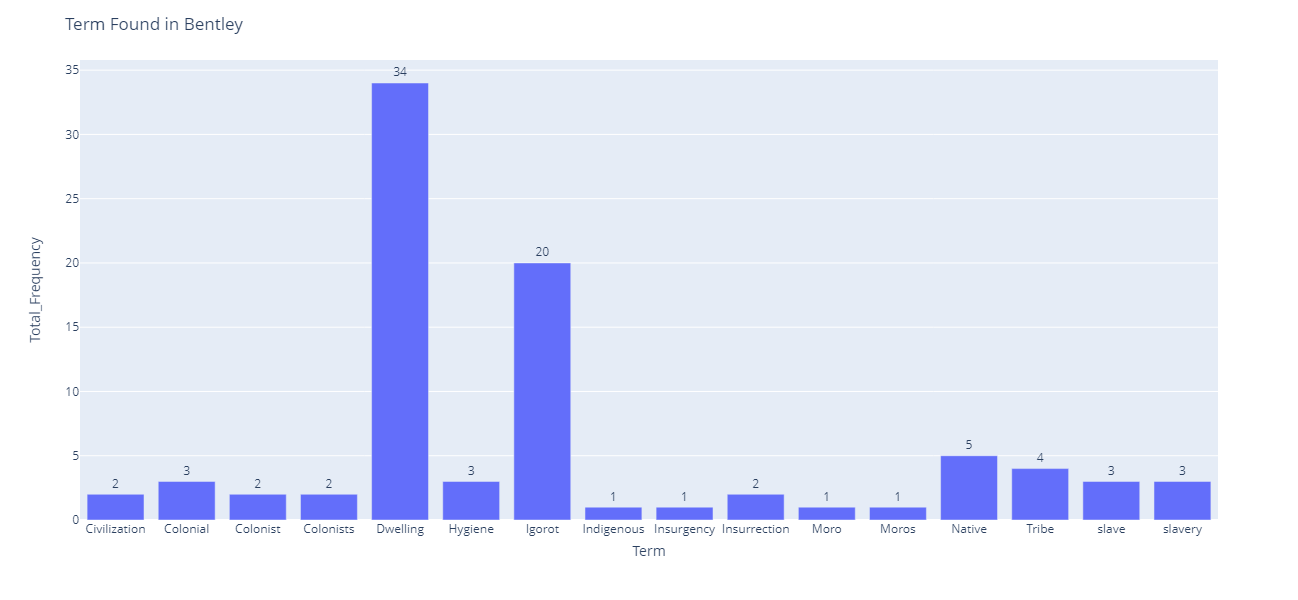

In [23]:
# visualization (this will not show in Github, cause GitHub does not render Plotly visualizations in its web interface)

fig = px.bar(term_frequency, x='Term', y='Total_Frequency', text='Total_Frequency')
fig.update_traces(textposition='outside', insidetextanchor='middle')
fig.update_layout(title_text="Term Found in Bentley", xaxis_title_standoff=10, height=600)
fig.show()
pio.write_image(fig, 'term_frequency_Bentley.png')

<span style="background-color: yellow; font-size: 15px;"> YOUR TODO: use and modify this one line code to export your matched results table to .csv file</span>

In [24]:
# export match_results to .csv
results_df.to_csv('matched_results_Bentley.csv', index=True)

(the following codes are similar steps for Clements and SCRC xml files)

### Matched results for - Clements

In [25]:
# TODO: select file pool

organized_data = df2_Clements

In [26]:
# Create a new dataframe with the matched results
results_df = pd.DataFrame([result for index, row in organized_data.iterrows() for result in match_terms(row, terms)])
results_df

ead_id                Term  Matched_Times  Matched_From  \
0   umich-wcl-M-417alg     Colony              1              bioghist       
1   umich-wcl-M-3468.2bro  slave               3              scopecontent   
2   umich-wcl-M-3468.2bro  enslaved            1              scopecontent   
3   umich-wcl-M-3468.2bro  Settler             1              bioghist       
4   umich-wcl-M-3468.2bro  Settlers            1              bioghist       
5   \numich-wcl-F-696tow   Dwelling            2              subjects       
6   \numich-wcl-F-696tow   Indigenous          1              subjects       
7   \numich-wcl-F-696tow   Balangiga Massacre  1              bioghist       
8   umich-wcl-M-3200joh    slave               1              bioghist       
9   umich-wcl-M-4634.4kre  Insurrection        1              bioghist       
10  umich-wcl-M-2133mac    Colony              1              bioghist       
11  \numich-wcl-M-4880nas  Colony              1              scopecontent   
12  umich-wcl-M-66she      Indigenous          1              subjects       
13  umich-wcl-M-66she      Moro                1              scopecontent   
14  umich-wcl-M-66she      slave               3              scopecontent   
15  umich-wcl-M-66she      Colonial            1              scopecontent   
16  umich-wcl-M-66she      Colonial            10             geognames      
17  umich-wcl-M-66she      Colonial            1              corpnames      
18  umich-wcl-M-2440whi    slave               2              scopecontent   
19  umich-wcl-M-2440whi    slave               1              bioghist       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [27]:
# frequency

term_frequency = results_df.groupby('Term')['Matched_Times'].sum().reset_index()
term_frequency.rename(columns={'Matched_Times': 'Total_Frequency'}, inplace=True)
term_frequency

,Term,Total_Frequency
0,Balangiga Massacre,1
1,Colonial,12
2,Colony,3
3,Dwelling,2
4,Indigenous,2
5,Insurrection,1
6,Moro,1
7,Settler,1
8,Settlers,1
9,enslaved,1


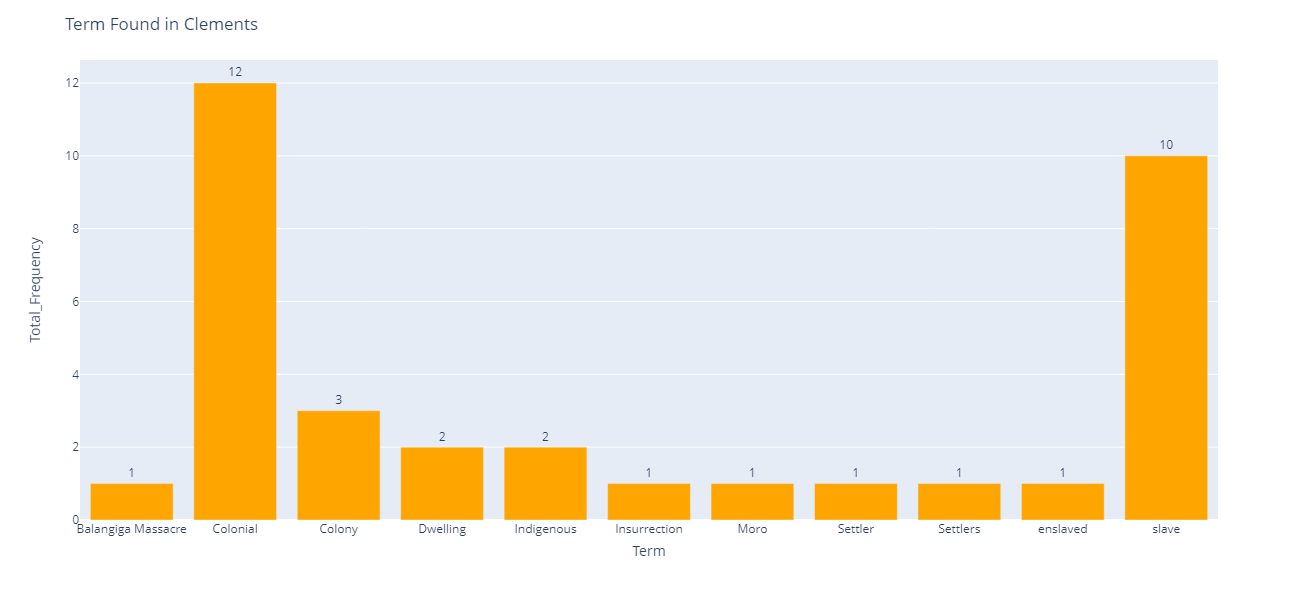

In [28]:
# visualization

fig = px.bar(term_frequency, x='Term', y='Total_Frequency', text='Total_Frequency')
fig.update_traces(textposition='outside', insidetextanchor='middle')
fig.update_layout(title_text="Term Found in Clements", xaxis_title_standoff=10, height=600)
fig.update_traces(marker_color='orange')
fig.show()
pio.write_image(fig, 'term_frequency_Clements.png')

In [29]:
# export match_results
results_df.to_csv('matched_results_Clements.csv', index=True)

### Matched results for - SCRC

In [30]:
# TODO: select file pool

organized_data = df3_SCRC

In [31]:
# Create a new dataframe with the matched results
results_df = pd.DataFrame([result for index, row in organized_data.iterrows() for result in match_terms(row, terms)])
results_df

ead_id            Term  Matched_Times  Matched_From  \
0  umich-scl-ams0067  Moro            2              bioghist       
1  umich-scl-ams0067  Moros           1              bioghist       
2  umich-scl-ams0047  Moro            1              abstract       
3  umich-scl-ams0047  Moro            1              scopecontent   
4  umich-scl-ams0047  Moro Rebellion  1              scopecontent   
5  umich-scl-hayden   Enemy           2              bioghist       
6  umich-scl-welsh    Native          1              bioghist       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [32]:
# frequency

term_frequency = results_df.groupby('Term')['Matched_Times'].sum().reset_index()
term_frequency.rename(columns={'Matched_Times': 'Total_Frequency'}, inplace=True)
term_frequency

,Term,Total_Frequency
0,Enemy,2
1,Moro,4
2,Moro Rebellion,1
3,Moros,1
4,Native,1


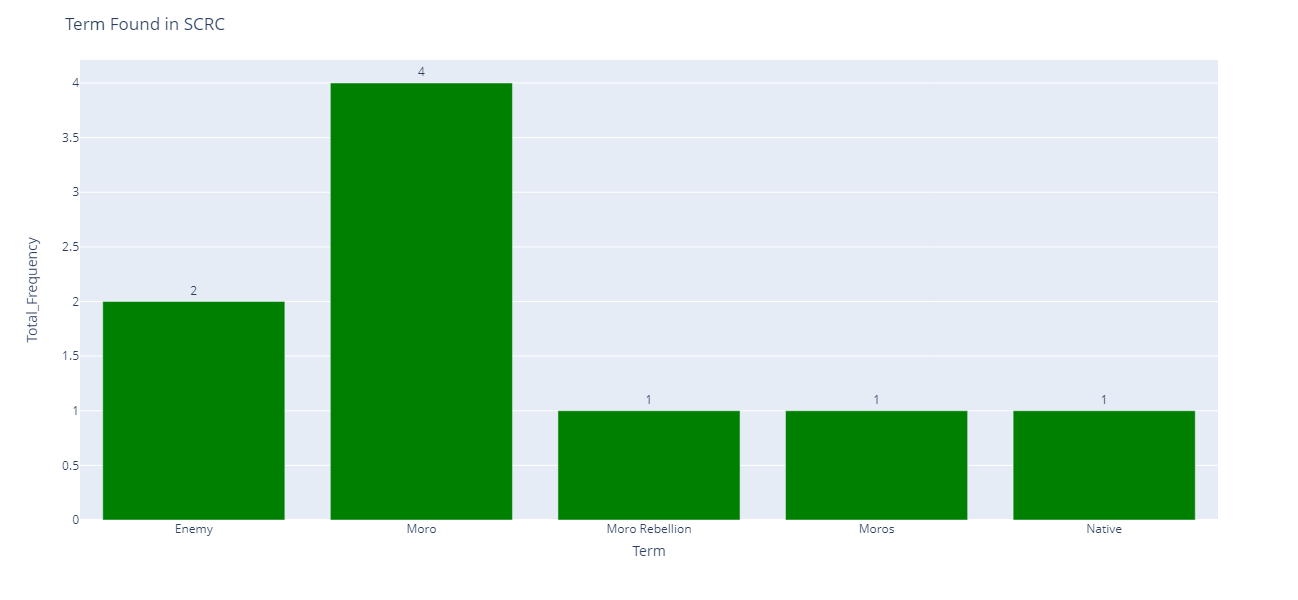

In [33]:
# visualization

fig = px.bar(term_frequency, x='Term', y='Total_Frequency', text='Total_Frequency')
fig.update_traces(textposition='outside', insidetextanchor='middle')
fig.update_layout(title_text="Term Found in SCRC", xaxis_title_standoff=10, height=600)
fig.update_traces(marker_color='green')
fig.show()
pio.write_image(fig, 'term_frequency_SCRC.png')

In [34]:
# export match_results
results_df.to_csv('matched_results_SCRC.csv', index=True)